# Install important dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mtl
import math
import yfinance as yf



import pandas_ta as pa




# Data

Download weekly data for S&P500 from the beginning to september 30th 2024  as *pd.DataFrame* from yahoo finance using yfinance API.

In [2]:
# Download historical data for Apple (AAPL) over the last 5 years
from datetime import datetime

sp500 = yf.Ticker("BTC-USD") # create a ticker symbol
date_format = '%Y-%m-%d'
end_date =  datetime.strptime("2024-11-25", date_format)
data = sp500.history(start ="2021-01-01" , end = end_date, interval = "1d")



In [14]:
data.shape

(1424,)

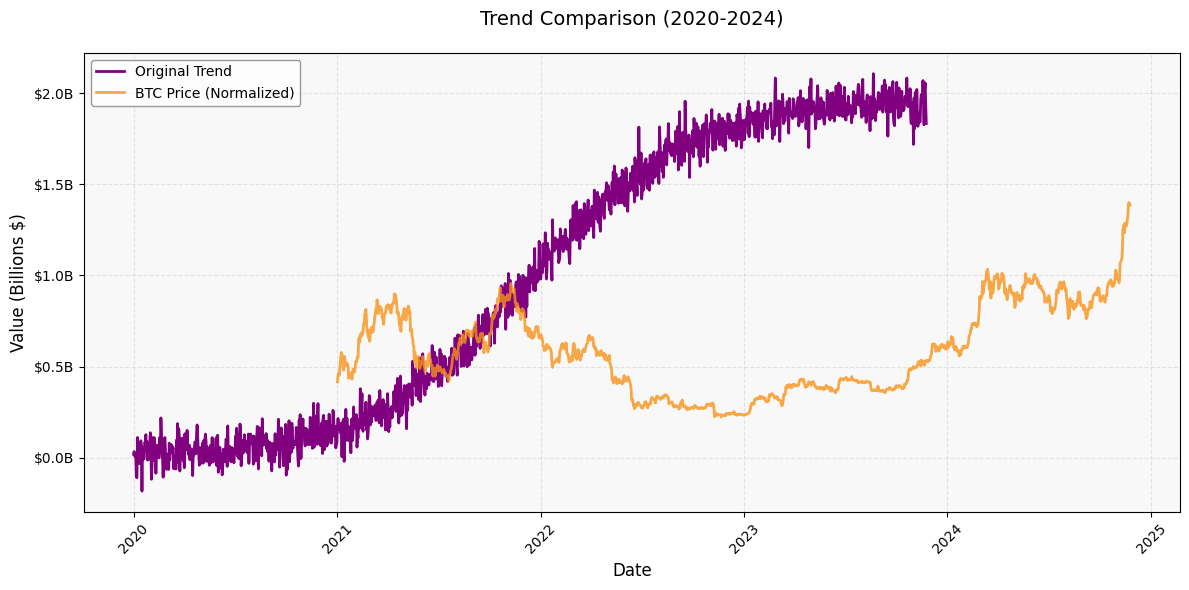

In [17]:

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Create date range with 1424 samples starting from 2020-01-01
date_range = [datetime(2020, 1, 1) + timedelta(days=x) for x in range(1424)]

# Generate synthetic data that follows a similar pattern to the image
# Using sigmoid-like function with noise for the first trend (from image)
x = np.linspace(0, 10, 1424)
trend1 = 1.4 * (1 / (1 + np.exp(-1.0 * (x - 5)))) + np.random.normal(0, 0.05, 1424)
# Scale to match the y-axis in the image (0 to 1.4B)
trend1 = trend1 * 1.4

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot original trend
ax.plot(date_range, trend1, 
        color='purple', 
        linewidth=2, 
        label='Original Trend')

# Plot your BTC data, normalized to similar scale
btc_normalized = data / data.max() * 1.4
ax.plot(data.index, btc_normalized, 
        color='#F7931A', 
        linewidth=2, 
        alpha=0.8,
        label='BTC Price (Normalized)')

# Customize the plot
ax.set_title('Trend Comparison (2020-2024)', fontsize=14, pad=20)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Value (Billions $)', fontsize=12)

# Format y-axis
ax.yaxis.set_major_formatter(lambda x, p: f'${x:.1f}B')

# Add grid
ax.grid(True, linestyle='--', alpha=0.3)

# Customize legend
ax.legend(loc='upper left', frameon=True, facecolor='white', edgecolor='gray')

# Set background style
ax.set_facecolor('#f8f8f8')
fig.patch.set_facecolor('white')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

plt.show()

In [ ]:
fig, ax = plt.subplot()
ax.plot()

In [54]:
data.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

# Technical indicators

drop every row where volume is 0

In [55]:
RSI = pa.rsi(data["Close"], length=14)
data["RSI"]=RSI
data["RSI"].isna().sum()

14

In [56]:
mask = data["RSI"].isna()
data.loc[mask]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI
Date,,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,0.0,0.0,NaN
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,0.0,0.0,NaN
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,0.0,0.0,NaN
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,0.0,0.0,NaN
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,0.0,0.0,NaN
2000-01-10 00:00:00-05:00,1441.469971,1464.359985,1441.469971,1457.599976,1064800000,0.0,0.0,NaN
2000-01-11 00:00:00-05:00,1457.599976,1458.660034,1434.420044,1438.560059,1014000000,0.0,0.0,NaN
2000-01-12 00:00:00-05:00,1438.560059,1442.599976,1427.079956,1432.250000,974600000,0.0,0.0,NaN
2000-01-13 00:00:00-05:00,1432.250000,1454.199951,1432.250000,1449.680054,1030400000,0.0,0.0,NaN


In [57]:
data.dropna(axis = 0, how = "any", inplace=True)
data.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
RSI             0
dtype: int64

# Buy/Sell points

In [58]:
def signals(x):
    if x>=70:
        return 1
    elif x<=30:
        return -1
    else:
        return 0 

In [59]:
total_signals = [0]*len(data)

data["backtest"] = data["RSI"].apply(signals)



In [60]:
data["backtest"].value_counts()

backtest
 0    5707
 1     386
-1     117
Name: count, dtype: int64

In [61]:

data_grouped = data.groupby(data.index.map(lambda x: x.year))
data_grouped["backtest"].value_counts().tail(20)

Date  backtest
2017   1           50
2018   0          219
       1           19
      -1           13
2019   0          222
       1           28
      -1            2
2020   0          227
       1           20
      -1            6
2021   0          238
       1           14
2022   0          239
      -1            9
       1            3
2023   0          218
       1           30
      -1            2
2024   0          158
       1           29
Name: count, dtype: int64

# Basic strategy Backtest 

In [3]:
from backtesting import Backtest
# from myBacktest import FirstStrategy
from mlModel.mlClass import MLBasedStrategy




/home/jacopomanenti/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:

ts = Backtest(data, MLBasedStrategy, cash = 10000000, commission=.002, trade_on_close=True)
# trade_on_close = True and look bias


stats = ts.run()

print(stats)



too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
too few
OVERBOUGHT SIGNAL DETECTED!
prediction: 1
Do I have a position? <Position: 0 (0 trades)>
OVERBOUGHT SIGNAL DETECTED!
prediction: 1
Do I have a position? <Position: 0 (0 trades)>
OVERBOUGHT SIGNAL DETECTED!
prediction: 1
Do I have a position? <Position: 0 (0 trades)>
OVERBOUGHT SIGNAL DETECTED!
prediction: 1
Do I have a position? <Position: 0 (0 trades)>
OVERBOUGHT SIGNAL DETECTED!
prediction: 1
Do I have a position? <Position: 0 (0 trades)>
OVERSOLD SIGNAL DETECTED!
prediction: 2
Do I have a position? <Position: 0 (0 trades)>
OVERSOLD SIGNAL DETECTED!
prediction: 2
Do I have a position? <Position: 0 (0 trades)>
OVERSOLD SIGNAL DETECTED!
prediction: 1
Do I have a position? <Position: 0 (0 trades)>
Buying
Attempting to b

/home/jacopomanenti/.local/lib/python3.10/site-packages/backtesting/backtesting.py:952: UserWarning: (2021-06-05 00:00:00+00:00) A contingent SL/TP order would execute in the same bar its parent stop/limit order was turned into a trade. Since we can't assert the precise intra-candle price movement, the affected SL/TP order will instead be executed on the next (matching) price/bar, making the result (of this trade) somewhat dubious. See https://github.com/kernc/backtesting.py/issues/119
  warnings.warn(
/home/jacopomanenti/.local/lib/python3.10/site-packages/backtesting/backtesting.py:952: UserWarning: (2021-06-22 00:00:00+00:00) A contingent SL/TP order would execute in the same bar its parent stop/limit order was turned into a trade. Since we can't assert the precise intra-candle price movement, the affected SL/TP order will instead be executed on the next (matching) price/bar, making the result (of this trade) somewhat dubious. See https://github.com/kernc/backtesting.py/issues/119
 

OVERSOLD SIGNAL DETECTED!
prediction: 1
Do I have a position? <Position: 0 (0 trades)>
Buying
Attempting to buy at 31637.779296875
Stop Loss: 30372.268125
Take Profit: 34801.5572265625
Order result: <Order size=0.1, limit=31637.7793, sl=30372.26812, tp=34801.55723, contingent=0>
Position after order: <Position: 0 (0 trades)>


/home/jacopomanenti/.local/lib/python3.10/site-packages/backtesting/backtesting.py:952: UserWarning: (2021-06-26 00:00:00+00:00) A contingent SL/TP order would execute in the same bar its parent stop/limit order was turned into a trade. Since we can't assert the precise intra-candle price movement, the affected SL/TP order will instead be executed on the next (matching) price/bar, making the result (of this trade) somewhat dubious. See https://github.com/kernc/backtesting.py/issues/119
  warnings.warn(


OVERSOLD SIGNAL DETECTED!
prediction: 2
Do I have a position? <Position: 0 (0 trades)>
OVERSOLD SIGNAL DETECTED!
prediction: 0
Do I have a position? <Position: 0 (0 trades)>
OVERBOUGHT SIGNAL DETECTED!
prediction: 1
Do I have a position? <Position: 0 (0 trades)>
OVERBOUGHT SIGNAL DETECTED!
prediction: 1
Do I have a position? <Position: 0 (0 trades)>
OVERBOUGHT SIGNAL DETECTED!
prediction: 1
Do I have a position? <Position: 0 (0 trades)>
OVERBOUGHT SIGNAL DETECTED!
prediction: 2
Do I have a position? <Position: 0 (0 trades)>
OVERBOUGHT SIGNAL DETECTED!
prediction: 1
Do I have a position? <Position: 0 (0 trades)>
OVERSOLD SIGNAL DETECTED!
prediction: 2
Do I have a position? <Position: 0 (0 trades)>
OVERSOLD SIGNAL DETECTED!
prediction: 0
Do I have a position? <Position: 0 (0 trades)>
OVERBOUGHT SIGNAL DETECTED!
prediction: 1
Do I have a position? <Position: 0 (0 trades)>
OVERBOUGHT SIGNAL DETECTED!
prediction: 2
Do I have a position? <Position: 0 (0 trades)>
OVERBOUGHT SIGNAL DETECTED!
p

/home/jacopomanenti/.local/lib/python3.10/site-packages/backtesting/backtesting.py:952: UserWarning: (2021-12-17 00:00:00+00:00) A contingent SL/TP order would execute in the same bar its parent stop/limit order was turned into a trade. Since we can't assert the precise intra-candle price movement, the affected SL/TP order will instead be executed on the next (matching) price/bar, making the result (of this trade) somewhat dubious. See https://github.com/kernc/backtesting.py/issues/119
  warnings.warn(


OVERSOLD SIGNAL DETECTED!
prediction: 1
Do I have a position? <Position: 0 (0 trades)>
Buying
Attempting to buy at 42591.5703125
Stop Loss: 40887.9075
Take Profit: 46850.727343750004
Order result: <Order size=0.1, limit=42591.57031, sl=40887.9075, tp=46850.72734, contingent=0>
Position after order: <Position: 0 (0 trades)>
OVERSOLD SIGNAL DETECTED!
prediction: 1
Do I have a position? <Position: 0 (0 trades)>
Buying
Attempting to buy at 36952.984375
Stop Loss: 35474.865
Take Profit: 40648.2828125
Order result: <Order size=0.1, limit=36952.98438, sl=35474.865, tp=40648.28281, contingent=0>
Position after order: <Position: 0 (0 trades)>
OVERBOUGHT SIGNAL DETECTED!
prediction: 1
Do I have a position? <Position: 0 (0 trades)>
OVERBOUGHT SIGNAL DETECTED!
prediction: 1
Do I have a position? <Position: 0 (0 trades)>
OVERSOLD SIGNAL DETECTED!
prediction: 2
Do I have a position? <Position: 0 (0 trades)>
OVERSOLD SIGNAL DETECTED!
prediction: 2
Do I have a position? <Position: 0 (0 trades)>
OVERBO

In [5]:
ts.plot()

/home/jacopomanenti/.local/lib/python3.10/site-packages/backtesting/_plotting.py:455: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = (df.assign(_width=1).set_index('datetime')


GridPlot(id='p1367', ...)

Try running the update-desktop-database command. If you
don't have this command you should install the
desktop-file-utils package. This package is available from
http://freedesktop.org/wiki/Software/desktop-file-utils/
No applications found for mimetype: text/html
./bin/xdg-open: 882: x-www-browser: not found
/bin/xdg-open: 882: firefox: not found
/bin/xdg-open: 882: iceweasel: not found
/bin/xdg-open: 882: seamonkey: not found
/bin/xdg-open: 882: mozilla: not found
/bin/xdg-open: 882: epiphany: not found
/bin/xdg-open: 882: konqueror: not found
/bin/xdg-open: 882: chromium: not found
/bin/xdg-open: 882: chromium-browser: not found
/bin/xdg-open: 882: google-chrome: not found
/bin/xdg-open: 882: www-browser: not found
/bin/xdg-open: 882: links2: not found
/bin/xdg-open: 882: elinks: not found
/bin/xdg-open: 882: links: not found
/bin/xdg-open: 882: lynx: not found
/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'file:///home/jacopomanenti/algo/Privacy-Prese

## Optimization

# Labels

Compute log returns

In [ ]:
data["Log"] = np.log(data['Close']/data['Close'].shift(1)).dropna()
data.fillna(0, inplace=True)
data.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI,backtest,Log
2024-09-23 00:00:00-04:00,5711.899902,5725.359863,5704.220215,5718.569824,3529550000,0.0,0.0,64.023898,0,0.002805
2024-09-24 00:00:00-04:00,5727.660156,5735.319824,5698.990234,5732.930176,3872710000,0.0,0.0,65.044479,0,0.002508
2024-09-25 00:00:00-04:00,5733.649902,5741.029785,5712.060059,5722.259766,3624910000,0.0,0.0,63.600716,0,-0.001863
2024-09-26 00:00:00-04:00,5762.220215,5767.370117,5721.009766,5745.370117,4391180000,0.0,0.0,65.392423,0,0.004031
2024-09-27 00:00:00-04:00,5755.359863,5763.779785,5727.339844,5738.169922,3898530000,0.0,0.0,64.329969,0,-0.001254


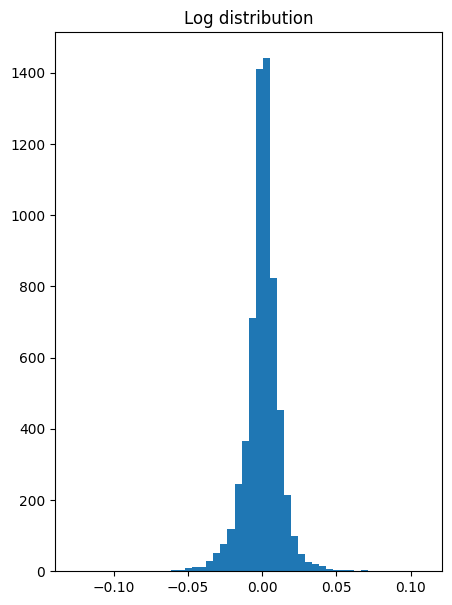

In [ ]:
fig = plt.figure(figsize=(5,7))

plt.hist(data["Log"], bins = 50)
plt.title("Log distribution")
plt.show()

Classify returns that are greater than 1 standard deviation from the mean as an uptrend and those that are below -1 standard deviation as a downtrend.

In [ ]:
descr = data["Log"].describe()
descr

count    6224.000000
mean        0.000220
std         0.012271
min        -0.127652
25%        -0.004811
50%         0.000600
75%         0.005917
max         0.109572
Name: Log, dtype: float64

In [ ]:
m_log = descr["mean"]
std_log = descr["std"]
 

# paramenter that can be used to optimize the ROC curve
up_tresh = m_log + std_log
down_tresh = m_log - std_log

In [ ]:

labels = pd.Series(np.where(data["Log"] > up_tresh, 1,np.where(data["Log"] < down_tresh, 2, 0)))
labels.value_counts()

0    4937
2     677
1     610
Name: count, dtype: int64

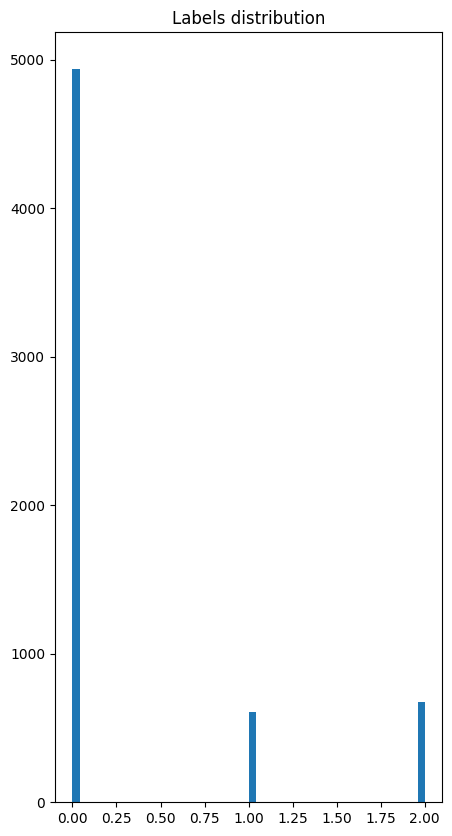

In [ ]:
fig = plt.figure(figsize=(5,10))
plt.hist(labels, bins=50)
plt.title("Labels distribution")
plt.show()

# Dataset

Set up the dataset:
* $y$ : add labels
* $\underline{X}$: add technical indicators  

In [ ]:

df = pd.DataFrame({"labels":labels}, )
df

,labels
0,0
1,2
2,0
3,0
4,1
...,...
6219,0
6220,0
6221,0
6222,0
